In [63]:
import igraph as ig
import matplotlib.pyplot as plt
import networkx as nwx
from datetime import datetime
import numpy as np
from scipy.optimize import curve_fit
import sys
sys.path.append('../')
from package_global_functions import *

def powerLaw(x,a,b):
    return b*x**a

In [ ]:
g = ig.Graph.Erdos_Renyi(35,0.01)
fig, ax = plt.subplots()
ig.plot(g, target=ax)

In [109]:
# sparse network, i.e. small p: use fast_gnp_random_graph
# g = nwx.fast_gnp_random_graph(n=35, p=0.01, seed=123)
g = nwx.fast_gnp_random_graph(n=35, p=0.1, seed=123)

# for higher p, use erdos_renyi_graph (alias for gnp_random_graph)

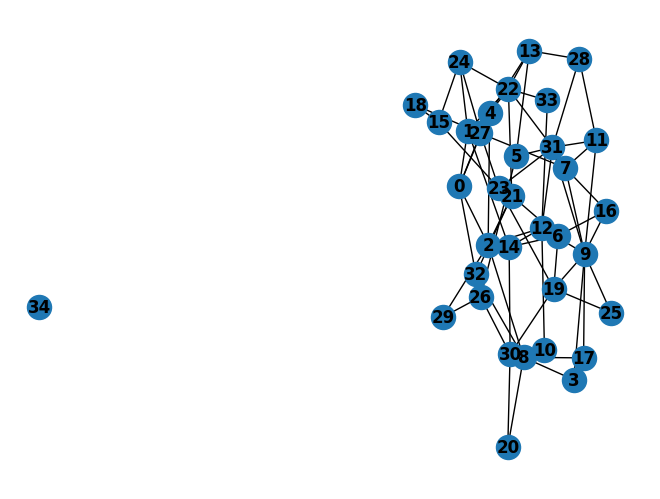

In [110]:
nwx.draw(g, with_labels=True, font_weight='bold')

In [21]:
nwx.betweenness_centrality(g)

{0: 0.8413547237076648,
 1: 0.5508021390374331,
 2: 0.0,
 3: 0.058823529411764705,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.16934046345811052,
 8: 0.058823529411764705,
 9: 0.2709447415329768,
 10: 0.0,
 11: 0.11586452762923351,
 12: 0.0,
 13: 0.0,
 14: 0.16934046345811052,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.11586452762923351,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.058823529411764705,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.058823529411764705,
 30: 0.0,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 0.0}

In [6]:
nwx.write_edgelist(g, 'provant.txt', data=False)

In [61]:
g = nwx.barabasi_albert_graph(n=35, m=6, seed=123)

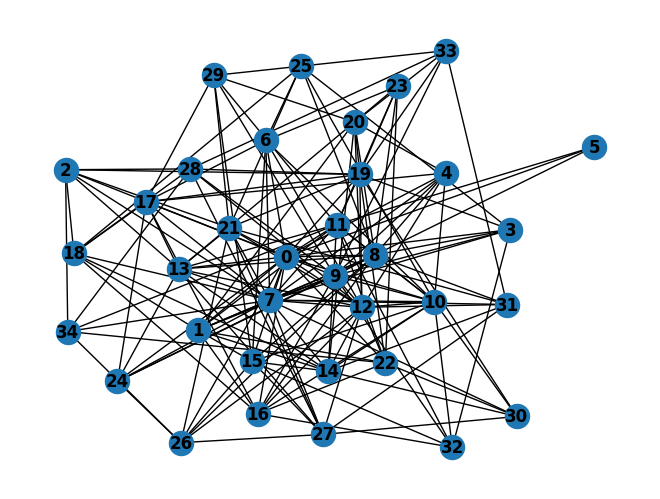

In [62]:
nwx.draw(g, with_labels=True, font_weight='bold')

In [29]:
N = 35
degrees = [int(round((N-1)*v,3)) for v in nwx.degree_centrality(g).values()]

## Erdos Renyi

In [118]:
N = 35
ps = [0.05, ]
for p in ps:
    degreesp = []
    for i in range(100):
        g = nwx.fast_gnp_random_graph(n=N, p=p, seed=int(datetime.now().timestamp()))
        degrees = [k for (id,k) in sorted(g.degree(), key=lambda pair: pair[0])]
        degreesp.extend(degrees)
    pdf, bin_edges = np.histogram(degreesp, bins=N-1, range=(0,N-1), density=True)
    # ks = bin_edges[:-1][pdf > 0]
    # popt, _ = curve_fit(powerLaw, ks, pdf[pdf>0])
    # #logarithmic binnning:
    # binLims = np.geomspace(1,N-1,50)
    # binCenters = np.sqrt(binLims[1:]*binLims[:-1])
    # binCenters, pdf, stdpdf = hist1D(degreesp, binLims, binCenters, isPDF=True)
    # ks = binCenters[pdf > 0]
    # poptlog, _ = curve_fit(powerLaw, ks, pdf[pdf>0], sigma=stdpdf[pdf >0])
    print(f'p = {p}')
    # print(f'gamma = {-1*popt[0]}, {-1*poptlog[0]}')
    print(f'avg k = {np.average(degreesp)}')

p = 0.05
avg k = 1.542857142857143


## Barabasi Albert

In [78]:
N = 10000
ms = [1,3,6]
for m in ms:
    degreesp = []
    for i in range(100):
        g = nwx.barabasi_albert_graph(n=N, m=m, seed=int(datetime.now().timestamp()))
        degrees = [k for (id,k) in sorted(g.degree(), key=lambda pair: pair[0])]
        degreesp.extend(degrees)
    pdf, bin_edges = np.histogram(degreesp, bins=N-1, range=(0,N-1), density=True)
    ks = bin_edges[:-1][pdf > 0]
    popt, _ = curve_fit(powerLaw, ks, pdf[pdf>0])
    #logarithmic binnning:
    binLims = np.geomspace(1,N-1,50)
    binCenters = np.sqrt(binLims[1:]*binLims[:-1])
    binCenters, pdf, stdpdf = hist1D(degreesp, binLims, binCenters, isPDF=True)
    ks = binCenters[pdf > 0]
    poptlog, _ = curve_fit(powerLaw, ks, pdf[pdf>0], sigma=stdpdf[pdf >0])
    print(f'm = {m}')
    print(f'gamma = {-1*popt[0]}, {-1*poptlog[0]}')
    print(f'avg k = {np.average(degreesp)}')

m = 1
gamma = 2.0914787665049213, 3.3346760767988344
avg k = 1.9998
m = 3
gamma = 1.0546034079420343, 1.0876874074632685
avg k = 5.9982
m = 6
gamma = 2.7082219056362207, 2.7360723502624857
avg k = 11.9928


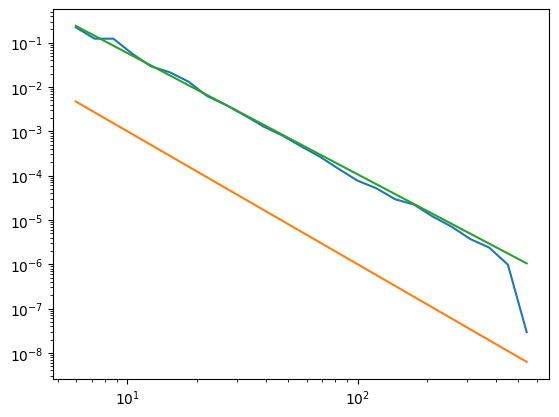

In [79]:
fig, ax = plt.subplots()
ax.set(xscale='log', yscale='log')
ax.plot(ks, pdf)
ax.plot(ks, ks**-3)
ax.plot(ks, powerLaw(ks, *poptlog))

In [87]:
all_ls = np.arange(0.1, 0.300000000000001, 0.1)

In [88]:
all_ls

array([0.1, 0.2, 0.3])

In [102]:
g = nwx.read_edgelist('nwk.txt', nodetype=int)
degrees = [k for (id,k) in sorted(g.degree(), key=lambda pair: pair[0])]

In [105]:
import pandas as pd

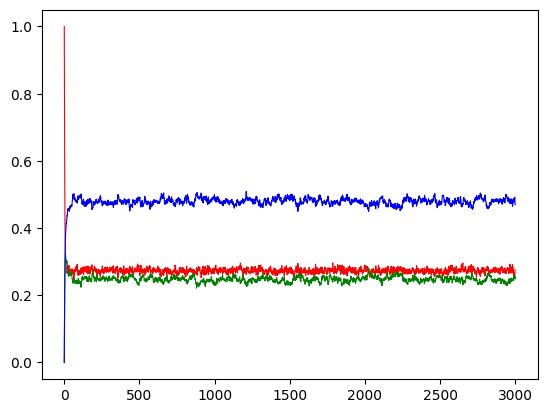

In [106]:
df = pd.read_csv('time_evo_csv/time_evo_rea_001.csv')
fig, ax = plt.subplots()
ax.plot(df['iter'], df['f0'], color='r', lw=0.8)
ax.plot(df['iter'], df['f1'], color='g', lw=0.8)
ax.plot(df['iter'], df['f2'], color='b', lw=0.8)